/content/NSEStockPrediction.py:77: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfg.fit(self.X_train,self.y_train)


0.9848250473324287
Baseline Error :  50.0240435081294  Prediction Error :  48.37170327287793
[54.8199998]


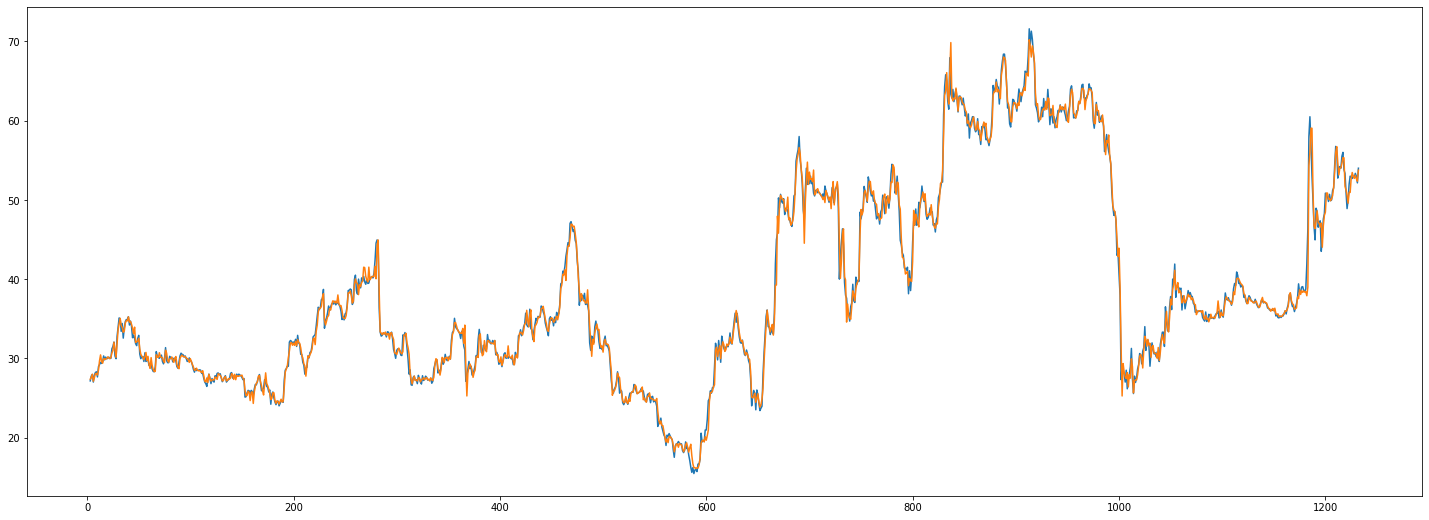

In [6]:
# this is custom module so either you can upload this in colab temporary file or need to mount google drive to access the file
from NSEStockPrediction import NSEStockPrediction
import pandas as pd

# getting data and dropping null values from it
rawdata1 = pd.read_csv("ADANIPOWER.csv")
rawdata1.dropna(inplace=True)

# initializing NSEStockPrediction module
nseStock = NSEStockPrediction()
# initializing project with mandatory parameters
TrainTest = nseStock.initProject(data=rawdata1, ohlc_input='Open', time_series_steps=3, time_series_output_steps=1, test_size=0.25)
# initializing random forest regressor
model = nseStock.initRandomForestRegressor(100,0)
# getting prediction of actual data using the algorithm
y_predict = nseStock.getTestYpredict(model)
# fetching the score of the algorithm
score = nseStock.getScore(model)
# plot the data
nseStock.plotTheData()
# getting errors both Baseline Error and Prediction Error
errors = nseStock.getErrorRates()
# priniting the error
print("Baseline Error : ",errors['baselineError']," Prediction Error : ",errors['predictionError'])
# predict the output from unknown data
predicted_output = nseStock.predict(rawdata1['Open'].tail(3),model)
# printing the predicted output
print(predicted_output)
